# Mineração de dados


In [1]:
# Importação Bibliotecas Básicas

import pandas as pd
import numpy as np


from mycolorpy import colorlist as mcp
import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv("C:\\Users\\alcid\\Livro_Cv_Certificados_aulas(v)\\Dados\\Hotel Reservations.csv")
display(df.head())

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [20]:
# Remoção do ID
print(f'\nDados duplicados {df.duplicated().sum()}')
ID = df.pop('Booking_ID')
display(df.head())


Dados duplicados 0


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
# Dados numéricos
df.select_dtypes(include=np.number).describe().T


,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [5]:
# Categóricos
df.select_dtypes(exclude=np.number).describe().T

,count,unique,top,freq
type_of_meal_plan,36275,4,Meal Plan 1,27835
room_type_reserved,36275,7,Room_Type 1,28130
market_segment_type,36275,5,Online,23214
booking_status,36275,2,Not_Canceled,24390


In [6]:
# Informações sobre tipo de dados e shape.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [7]:
# Verificar se há vazios
df.isnull().sum().sum()

0

# Identificação de padrões
 
<li>A busca por padrões é uma das atividades da mineração de dados, porque ao entender o comportamento dos dados acaba ficando mais fácil a modelagem de um modelo de ML, pois a criação de novas features, assim como a remoção de features podem ser feitos a partir do entendimento melhor dos dados.
<li> Ao analisar os dados acima sobre dispersão dos dados, é possível observar que há dados com pouca dispersão numérica, permitindo assim uma consideração qualitativa do que quantitativa.
<li> Então dados com frequência máxima de até 13 serão consideradas como qualitativas para a análise.
<li> Como os códigos de visualização gráfica ocupam muito espaço, eles foram separados em um modulo chamado "figuras.py", sendo possível acessar na mesma pasta deste trabalho, presente no repositório portfólio no github.
    

In [8]:
# Modulo criado para conter as funções gráficas.
import figuras

Importação realizada com sucesso.


In [9]:
# Criação de um dataset temporário para análise dos dados.
df_cat = df.copy() # Cópia de segurança
colunas_trasnformar = df.select_dtypes(include=np.number).nunique()[df.select_dtypes(include=np.number).nunique()<=13].index
# Colunas_transformar irá selecionar os atributos com 13 ou menos categorias.
df_cat = pd.concat([df_cat.select_dtypes(exclude=np.number), df.loc[:,colunas_trasnformar]],axis=1) # Irá juntar as duas tabelas
df_cat = df_cat.astype(str) # Passar todos para o formato string
display(df_cat)
df_cat.info() # Demonstrar que realmente a operação foi um sucesso

,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status,no_of_adults,no_of_children,no_of_weekend_nights,required_car_parking_space,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,no_of_special_requests
0,Meal Plan 1,Room_Type 1,Offline,Not_Canceled,2,0,1,0,2017,10,0,0,0
1,Not Selected,Room_Type 1,Online,Not_Canceled,2,0,2,0,2018,11,0,0,1
2,Meal Plan 1,Room_Type 1,Online,Canceled,1,0,2,0,2018,2,0,0,0
3,Meal Plan 1,Room_Type 1,Online,Canceled,2,0,0,0,2018,5,0,0,0
4,Not Selected,Room_Type 1,Online,Canceled,2,0,1,0,2018,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,Meal Plan 1,Room_Type 4,Online,Not_Canceled,3,0,2,0,2018,8,0,0,1
36271,Meal Plan 1,Room_Type 1,Online,Canceled,2,0,1,0,2018,10,0,0,2
36272,Meal Plan 1,Room_Type 1,Online,Not_Canceled,2,0,2,0,2018,7,0,0,2
36273,Not Selected,Room_Type 1,Online,Canceled,2,0,0,0,2018,4,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   type_of_meal_plan             36275 non-null  object
 1   room_type_reserved            36275 non-null  object
 2   market_segment_type           36275 non-null  object
 3   booking_status                36275 non-null  object
 4   no_of_adults                  36275 non-null  object
 5   no_of_children                36275 non-null  object
 6   no_of_weekend_nights          36275 non-null  object
 7   required_car_parking_space    36275 non-null  object
 8   arrival_year                  36275 non-null  object
 9   arrival_month                 36275 non-null  object
 10  repeated_guest                36275 non-null  object
 11  no_of_previous_cancellations  36275 non-null  object
 12  no_of_special_requests        36275 non-null  object
dtypes: object(13)
me

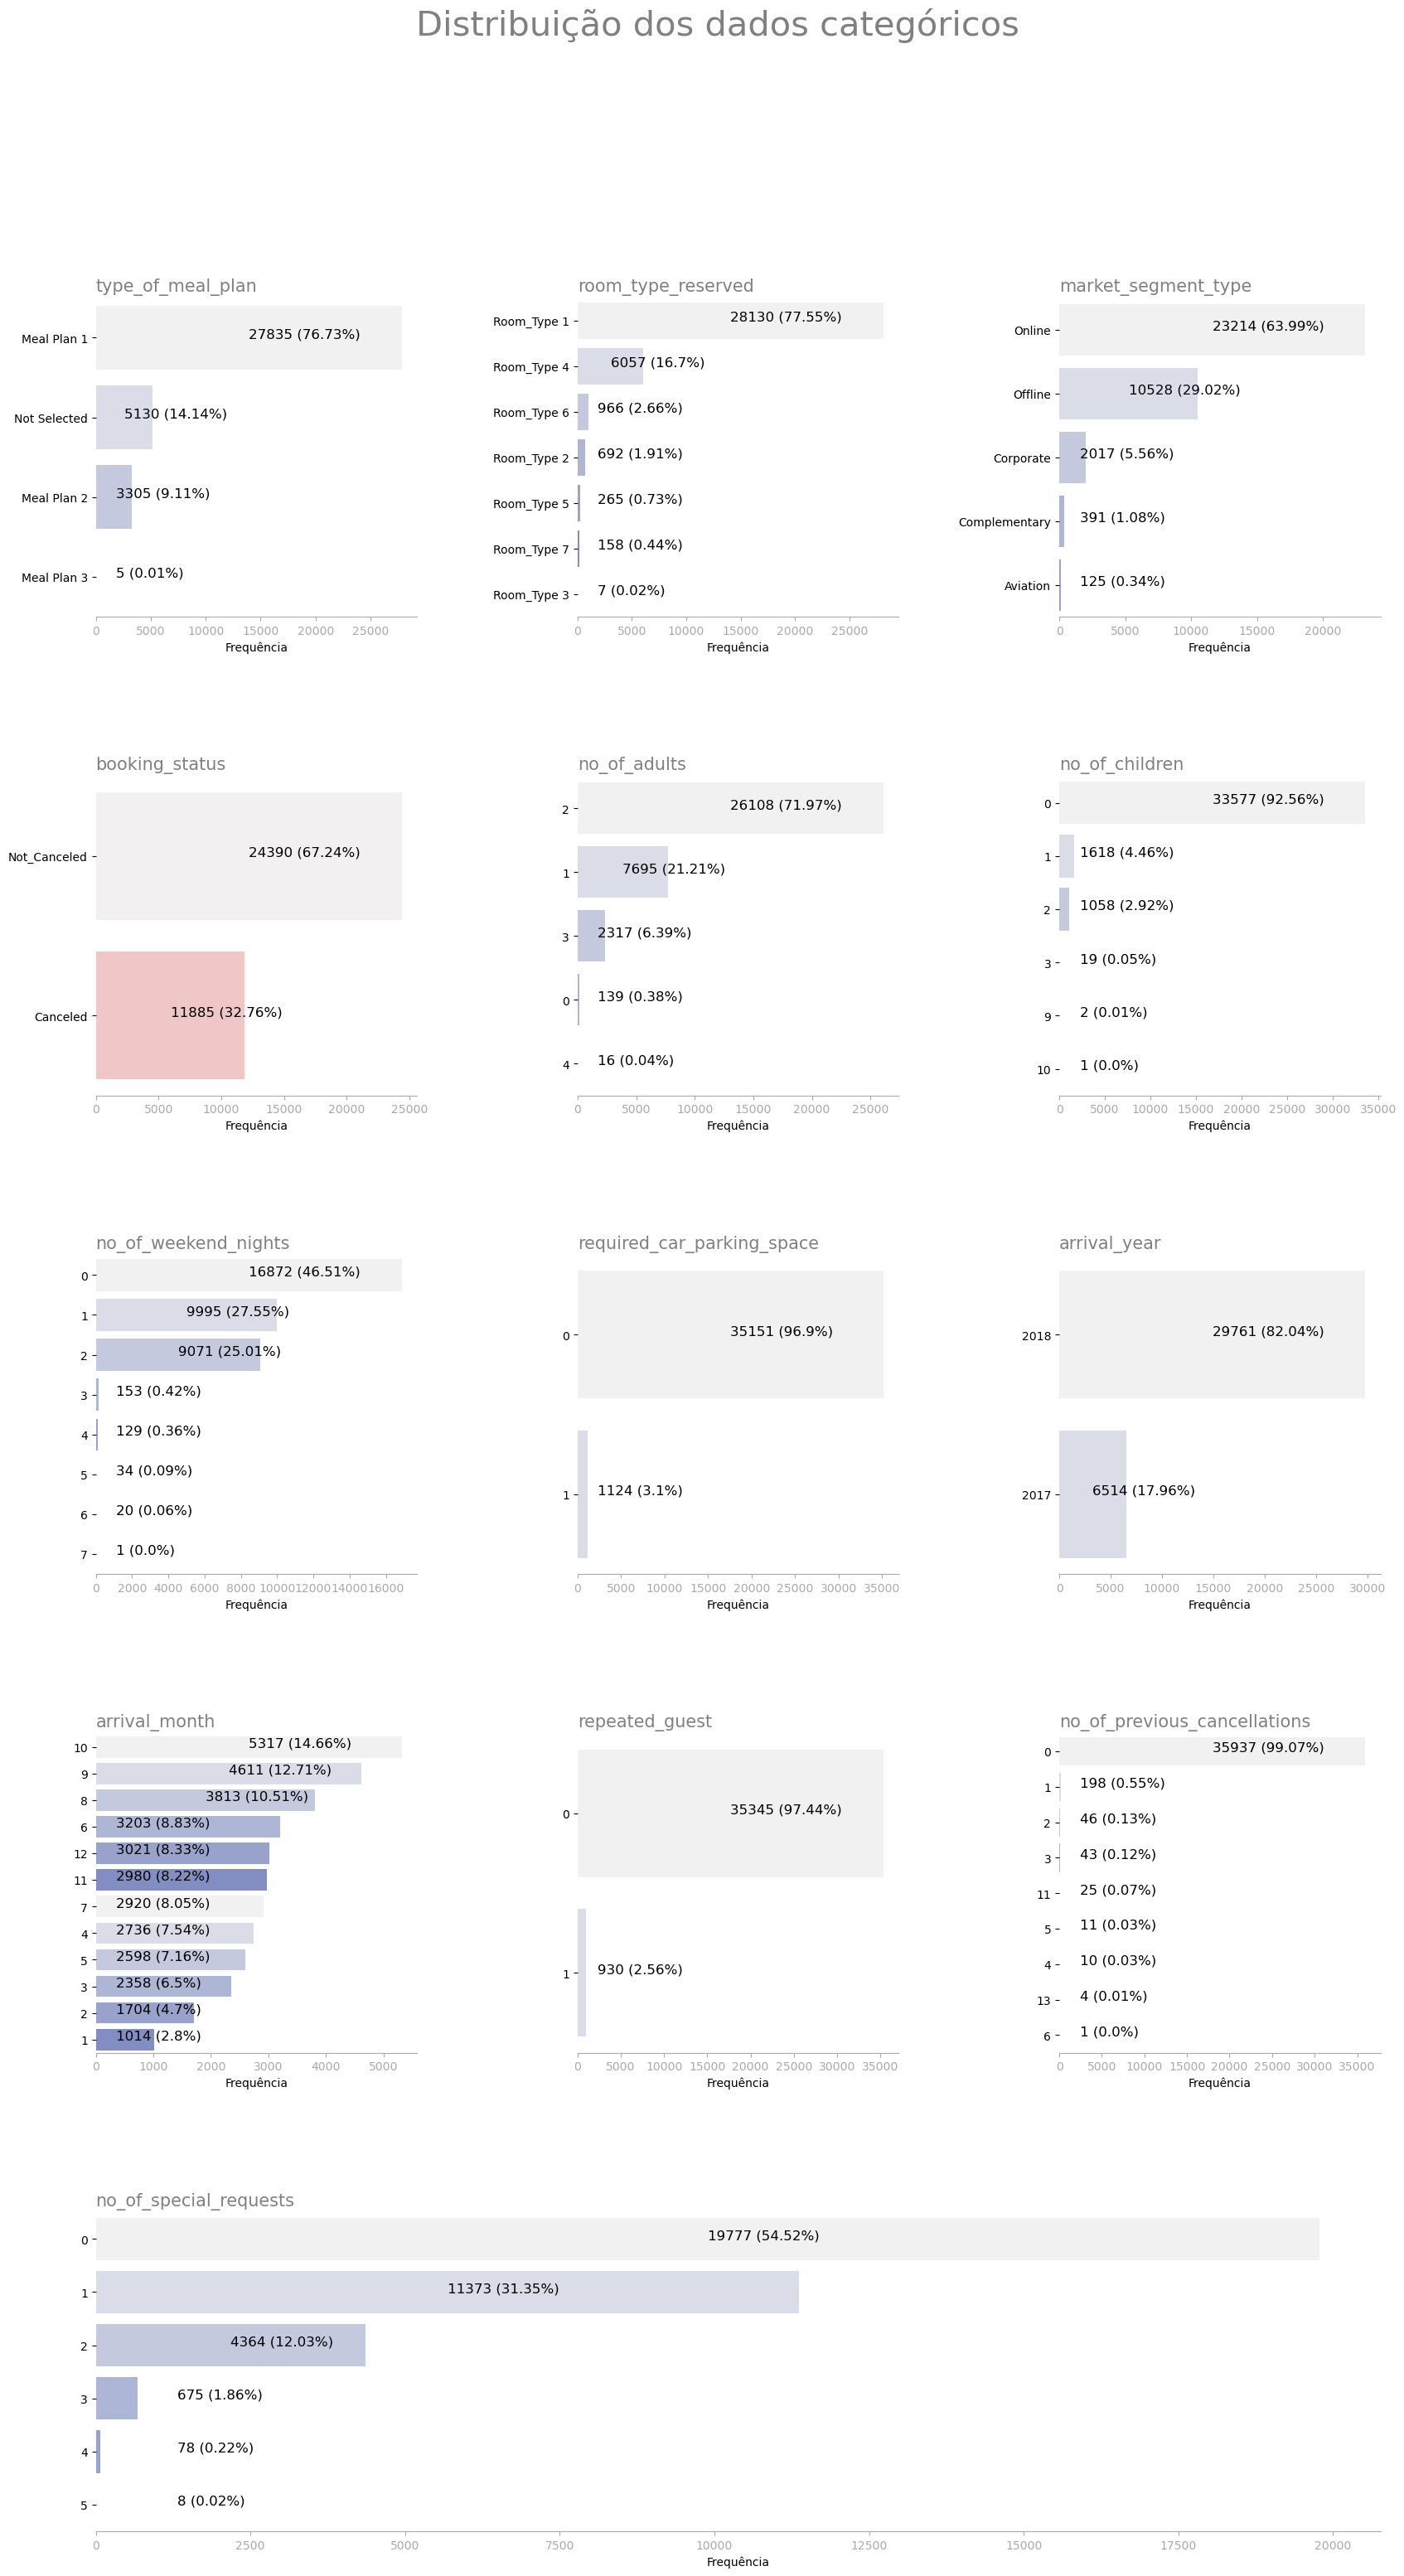

In [10]:
figuras.barras_(df_cat, titulo='Distribuição dos dados categóricos',tamanho=(5,3),t_imagem=(20,35), target='booking_status')

In [21]:
def disp_(dados: list, titulo: str, tamanho: tuple) -> None:
  """
  Modelo retorna um subplot dentro do subplot com o box e o histograma
  para os dados numéricos.
  """

# ========================= Configurações =========================

    dt = dados.copy()
    fig = plt.figure(figsize=(20, 13))
    outer = gridspec.GridSpec(4, 2, wspace=0.3, hspace=0.2) # Tamanho de imagem.
    rows = tamanho[0] #Linhas
    cols = tamanho[1] #Colunas
    fig.suptitle(titulo, fontsize=30, color='dimgrey') # Título da figura.

# ========================= Plotagem ==============================
    flierprops = dict(marker='x', markerfacecolor='r', markersize=4,
                  linestyle='none', markeredgecolor='gold') # Ajustes de como os outliers serão mostrados.

    for i in range(0,rows,2): # Loop para passar por cada Coluna e Linhas.
        for j in range(cols):
      # ---------------- Plotagem do BoxPlot --------------------
          try:
            inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                              subplot_spec=outer[i+j], wspace=0.1, hspace=0)  # Criando 2 espaços na posição gráfica.

            nome = df.select_dtypes(include=np.number).iloc[:,i+j].name # Extrair qual coluna será mostrada.
            ax = plt.Subplot(fig, inner[0]) # Axis .
            fig.add_subplot(ax) # Adicionar o axis na figura.

            box = sns.boxplot(data=df, # Plotagem Gráfica
                              orient='h',
                              x = nome,
                              ax=ax, width=.3, color='lightyellow', flierprops=flierprops) 


            box.axis('off') # Desativar barras de eixo.
            box.set_title(f'{nome}',horizontalalignment='left', x=0,fontsize=18,color='dimgrey') # Título.
             # ------= Plotagem dos quantiles.
            quantiles = df[nome].quantile([0.25, 0.75]).values.tolist() # Separação dos quantiles.
            LI = quantiles[0] - ((quantiles[1] - quantiles[0])*1.5)
            LS = quantiles[1] + ((quantiles[1] - quantiles[0])*1.5)
            if LI < df[nome].min():
                LI = df[nome].min()
            if LS > df[nome].max():
                LS = df[nome].max()

            for ix in [int(LI),int(LS)]: # Plotar no gráfico.
                box.annotate(round(ix,2), xy=(ix, 0.22), fontsize=12, color='black')
            for ix in quantiles:
                box.annotate(round(ix,2), xy=(ix, 0.22), fontsize=12, color='black')
        except:
            pass

        for j in range(cols):
          # ---------------- Plotagem do Histograma -------------------
          try:
              inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                                subplot_spec=outer[i+j], wspace=0.1, hspace=0) # Criando 2 espaços na posição gráfica.

              nome = df.select_dtypes(include=np.number).iloc[:,i+j].name # Selecionar coluna a ser trabalhada.

              ax = plt.Subplot(fig, inner[1]) # Axis.
              fig.add_subplot(ax) # Adicionar o axis na figura.

              hist = sns.histplot(data=df, x = nome,color='lightyellow') # Plotagem Histograma.

              # ---------- Configurações de axis.
                # Desativar Barras de eixo.
              hist.spines['top'].set_visible(False)
              hist.spines['right'].set_visible(False)
                # Definir Cor das Barras de eixo.
              hist.spines['left'].set_color('darkgrey')
              hist.spines['bottom'].set_color('darkgrey'),
                # Parâmetros do tick.
              hist.tick_params(axis='both', colors='darkgrey')
              hist.set(xlabel='', ylabel='')



        except:
            pass
    return plt.show()


IndentationError: unexpected indent (3742741535.py, line 9)

In [43]:
def disp_(dados: list, titulo: str, tamanho: tuple, fig_size: tuple) -> None:
    """
    Modelo retorna um subplot dentro do subplot com o box e o histograma
    para os dados numéricos.
    tamanho => tuple: Vai definir quantos gráficos estarão presentes dentro da imagem, na posição tamanho[0] estará quantas
    linhas a imagem deve ter, já no tamanho[1] quantas colunas. 
    """
    dt = dados.copy()
    fig = plt.figure(figsize=fig_size)
    outer = gridspec.GridSpec(tamanho[0], tamanho[1], wspace=0.3, hspace=0.2) # Tamanho de imagem.
    rows = tamanho[0]*2 #Linhas totais, será o tamanho[0]  multiplicado por 2.
    cols = 2 #Colunas
    fig.suptitle(titulo, fontsize=30, color='dimgrey') # Título da figura.
    
    plt.subplots_adjust(wspace = 0.5, # Espaço vertical entre os gráficos
                        hspace = 0.5) # Espaço horizontal entre os gráficos

# ========================= Plotagem ==============================
        # Configuração dos outliers mostrados no boxplot
    flierprops = dict(marker='x', markerfacecolor='r', markersize=4,
                  linestyle='none', markeredgecolor='red') #
    
    column = 0
        # Loop para geração do gráfico
    for i in range(0,rows,2): # linhas
        for j in range(cols): # Colunas
            
            coluna = dt.columns[column] # Coluna sendo trabalhada no looping
            
                # Criar 2 gráficos dentro de uma posição.
            inner = gridspec.GridSpecFromSubplotSpec(2, 1, # Linha e coluna
                                                     subplot_spec=outer[i+j], # inner de gráfico interno, outer de imagem externa 
                                                     wspace=0.1, hspace=0)  # ajustes entre os dois gráficos criados
            
                # ---- Criar gráfico de box-plot -----------------
            ax = plt.Subplot(fig, inner[0]) # Axis .
            fig.add_subplot(ax) # Adicionar o axis na figura.
            
            box = sns.boxplot(data=dt, # Plotagem Gráfica
                              orient='h',
                              x = dt[coluna],
                              ax=ax, width=.3, color='green', flierprops=flierprops) 


            box.axis('off') # Desativar barras de eixo.
            box.set_title(f'{dt.columns[column]}',horizontalalignment='left', x=0,fontsize=18,color='dimgrey') # Título.
            
                # ---- Criar gráfico histograma. --------------
            ax = plt.Subplot(fig, inner[1]) # Axis .
            fig.add_subplot(ax) # Adicionar o axis na figura.
            
            hist = sns.histplot(data=dt, x = coluna,color='lightyellow') # Plotagem Histograma.
            
            
            
            column += 1
    return plt.show()

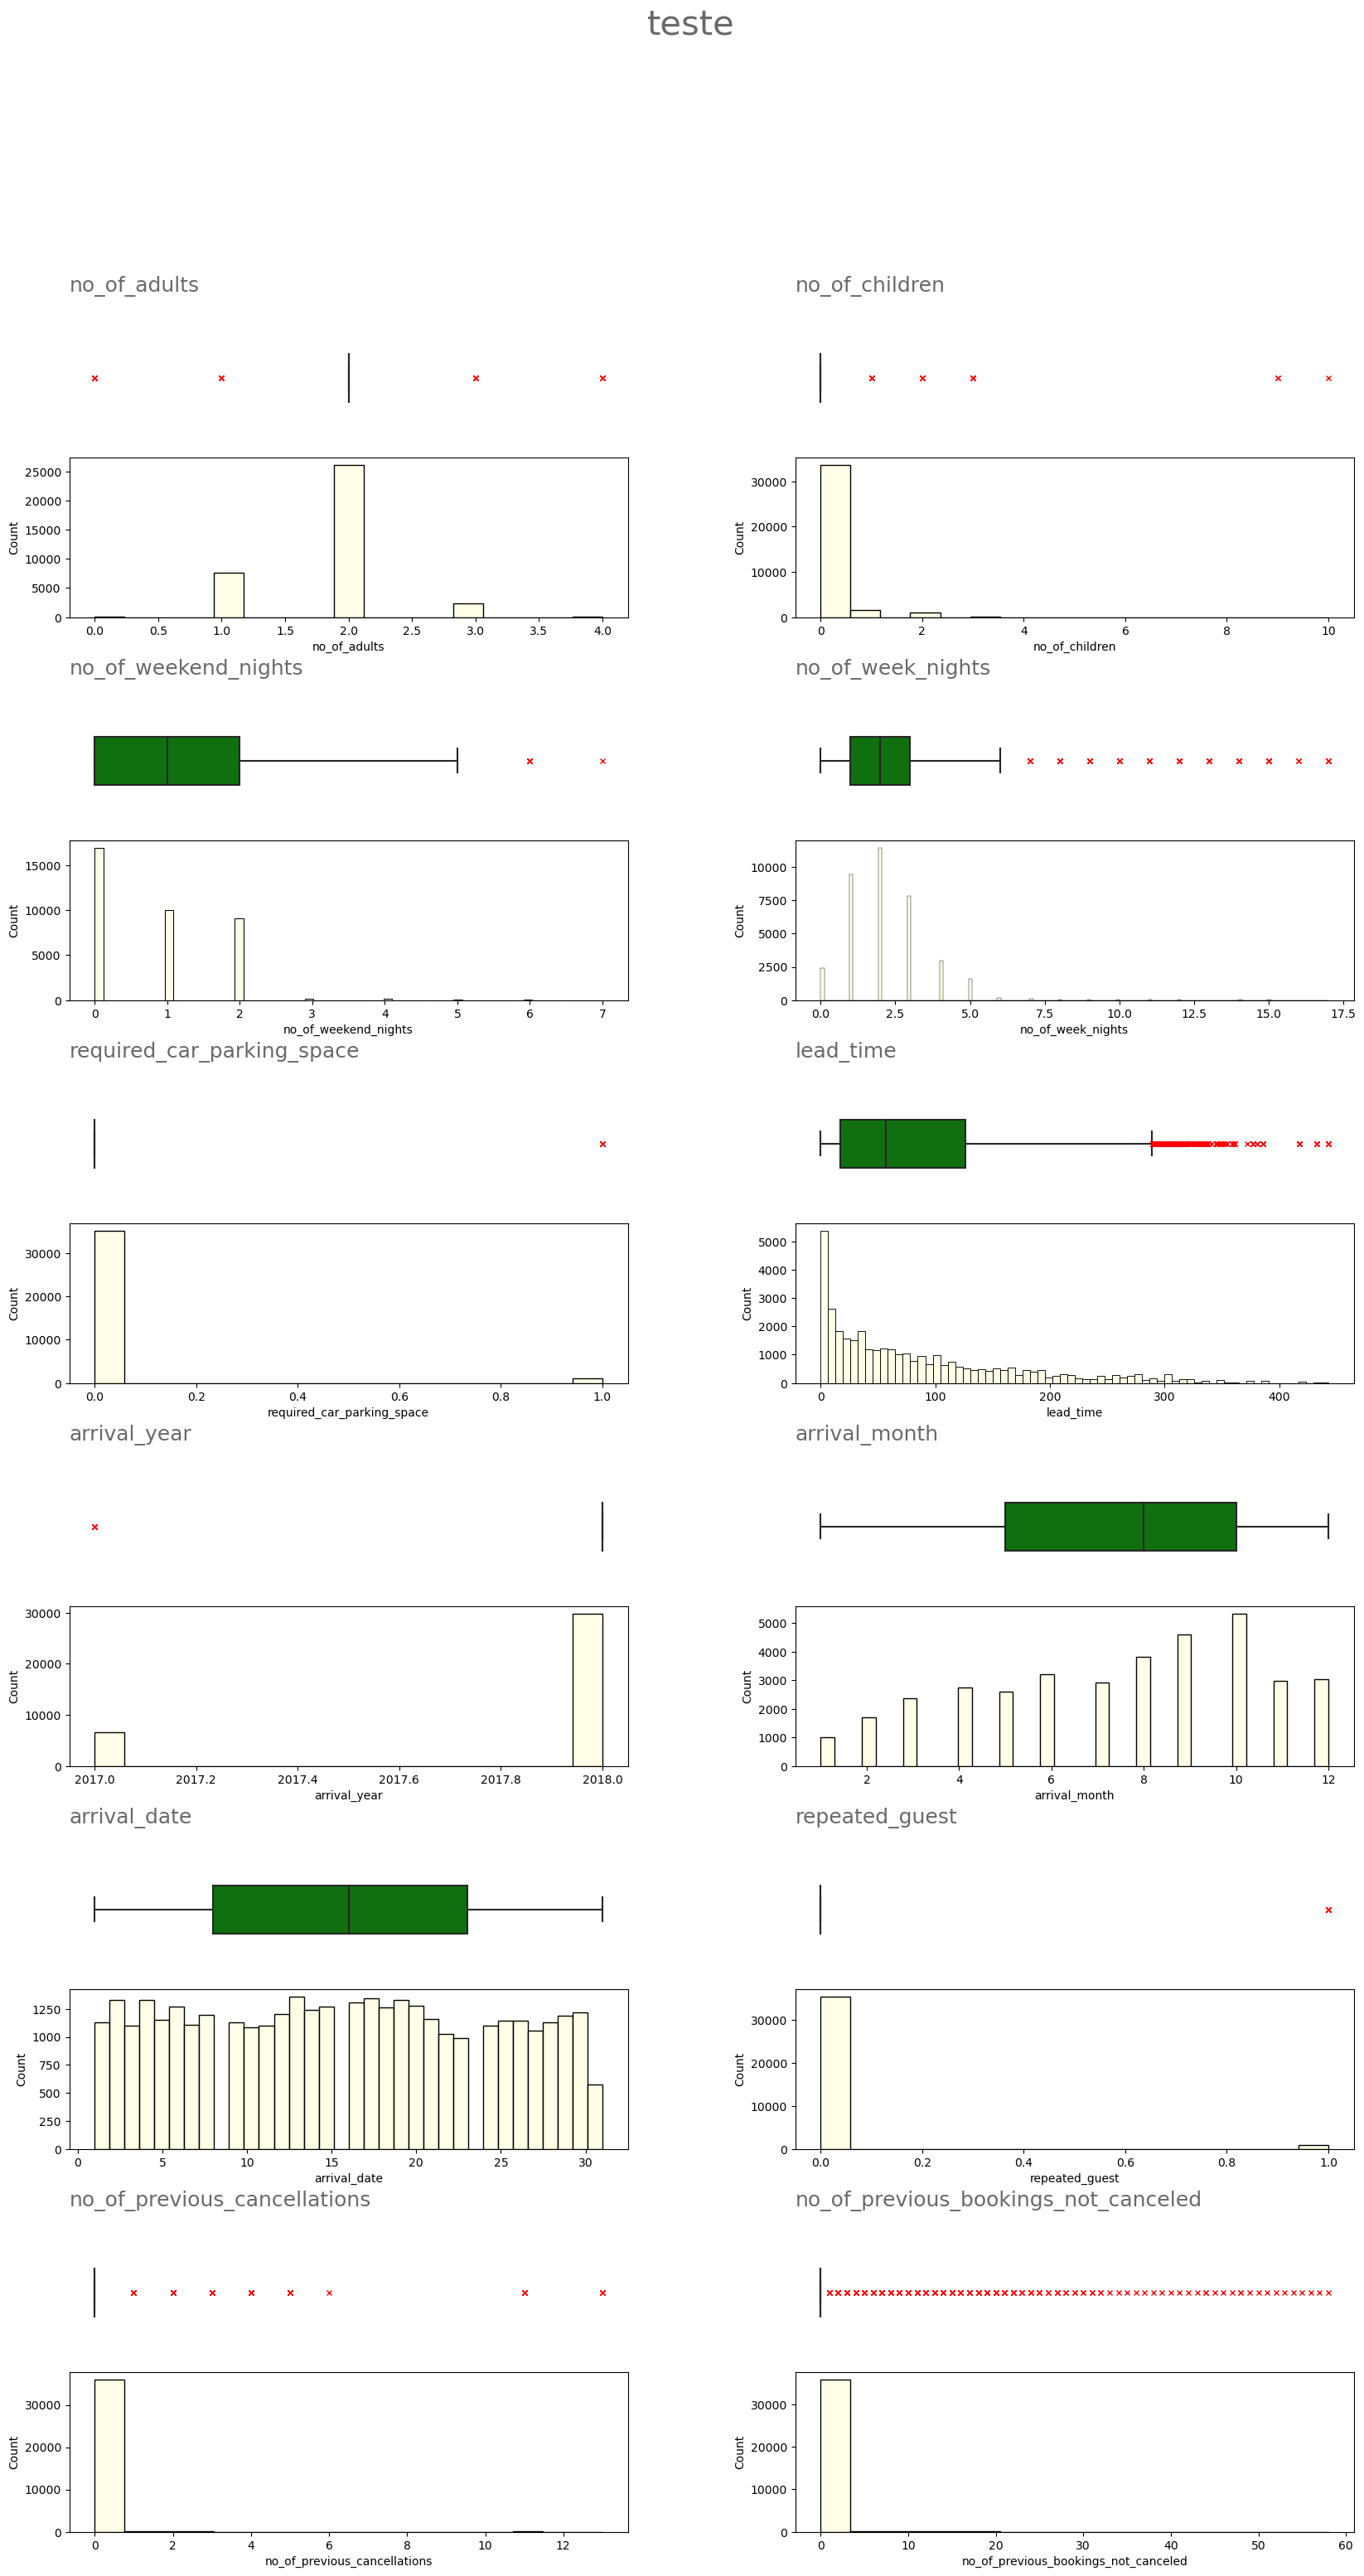

In [44]:
disp_(df.select_dtypes(include=np.number), titulo='teste', tamanho=(6,2), fig_size=(20,35))

In [ ]:
df